<a href="https://colab.research.google.com/github/John-Kyalo/KenyanDebtAnalysis/blob/main/Kenyan_Debt_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KENYAN DEBT ANALYSIS**

An Analysis of Kenyan Debt Trends and Sustainability from 2021 to Present"

Kenya's debt levels have been a growing concern, with both domestic and external debt contributing significantly to the country's financial obligations. Understanding the trends, composition, and sustainability of this debt is crucial for economic planning and policy formulation. However, there is a need for a comprehensive analysis that provides insights into the debt dynamics, evaluates the impact of government policies, and forecasts future debt levels. This project aims to address these needs by analyzing Kenyan debt data from 2021 to the present, identifying key trends, assessing debt sustainability, and offering actionable recommendations for managing debt effectively.

In [ ]:
!apt-get install git
!git config --global user.name "JohnKyalo"
!git config --global user.email "johnkyalo212@gmail.com"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/JohnKyalo/KenyanDebtAnalysis.git

Cloning into 'KenyanDebtAnalysis'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
#IMPORTING KEY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#LOADING THE DATA
df = pd.read_csv('/content/Public Debt (Ksh Million).csv')
df

,Year,Month,Domestic Debt,External Debt,Total
0,2021,December,"4,032,368.18","4,174,371.53","8,206,739.71"
1,2021,November,"4,008,077.30","4,109,282.85","8,117,360.15"
2,2021,October,"3,959,523.30","4,083,124.54","8,042,647.84"
3,2021,September,"3,937,777.45","4,062,504.78","8,000,282.23"
4,2021,August,"3,864,875.78","4,054,862.85","7,919,738.63"
...,...,...,...,...,...
257,2000,July,"202,362.00","394,667.37","597,029.37"
258,2000,June,"206,127.00","395,694.00","601,821.00"
259,2000,March,"201,463.22","396,800.00","598,263.22"
260,1999,December,"190,300.00","311,953.00","502,253.00"


In [ ]:
df.isnull().sum()

Year             0
Month            0
Domestic Debt    0
External Debt    0
Total            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           262 non-null    int64 
 1   Month          262 non-null    object
 2   Domestic Debt  262 non-null    object
 3   External Debt  262 non-null    object
 4   Total          262 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.4+ KB


In [ ]:
df['Domestic Debt'] = df['Domestic Debt'].str.replace(',', '').astype(float)
df['External Debt'] = df['External Debt'].str.replace(',', '').astype(float)
df['Total'] = df['Total'].str.replace(',', '').astype(float)

In [ ]:
df.describe()

,Year,Domestic Debt,External Debt,Total
count,262.000000,2.620000e+02,2.620000e+02,2.620000e+02
mean,2010.572519,1.166927e+06,1.213153e+06,2.380080e+06
std,6.327015,1.058535e+06,1.104623e+06,2.159117e+06
min,1999.000000,1.834170e+05,3.119530e+05,5.022530e+05
25%,2005.000000,3.262354e+05,4.175753e+05,7.512072e+05
50%,2011.000000,7.328289e+05,6.230025e+05,1.361437e+06
75%,2016.000000,1.813763e+06,1.801866e+06,3.615630e+06
max,2021.000000,4.032368e+06,4.174372e+06,8.206740e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           262 non-null    int64  
 1   Month          262 non-null    object 
 2   Domestic Debt  262 non-null    float64
 3   External Debt  262 non-null    float64
 4   Total          262 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.4+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '/' + df['Month'].astype(str) .str.zfill(2))
#df = df.set_index('Date')
#df = df.drop(['Year', 'Month'], axis=1
df.head()

<ipython-input-12-86c632f78862>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + '/' + df['Month'].astype(str) .str.zfill(2))


,Year,Month,Domestic Debt,External Debt,Total,Date
0,2021,December,4032368.18,4174371.53,8206739.71,2021-12-01
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01


<function matplotlib.pyplot.show(close=None, block=None)>

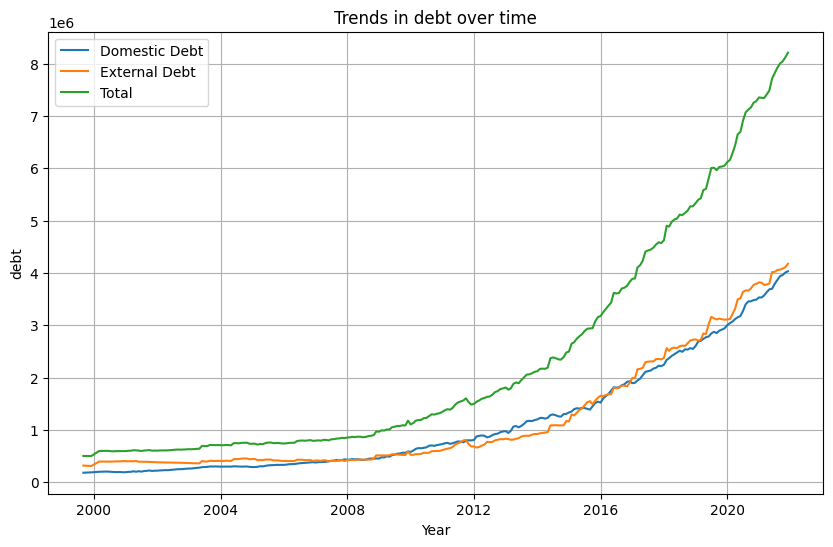

In [35]:
plt.figure(figsize = (10,6))
plt.plot(df['Date'], df['Domestic Debt'], label = 'Domestic Debt')
plt.plot(df['Date'], df['External Debt'], label = 'External Debt')
plt.plot(df['Date'], df['Total'], label = 'Total')
plt.title('Trends in debt over time')
plt.xlabel('Year')
plt.ylabel('debt')
plt.legend()
plt.grid(True)
plt.show

In [37]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date,Domestic Month Over Month Debt Difference,External debt Month Over Month Debt Difference,Total debt Month Over Month Debt Difference,Domestic Year Over Year Debt Difference,External debt Year Over Year Debt Difference,Total debt Year Over Year Debt Difference,Domestic Debt Composition,External Debt Composition,Domestic Month Over Month Growth Rate,External debt Month Over Month Growth Rate,Total debt Month Over Month Growth Rate,Domestic Year Over Year Growth Rate,External debt Year Over Year Growth Rate
261,1999,September,183417.00,320137.00,503554.00,1999-09-01,NaN,NaN,NaN,NaN,NaN,NaN,36.424495,63.575505,NaN,NaN,NaN,NaN,NaN
260,1999,December,190300.00,311953.00,502253.00,1999-12-01,6883.00,-8184.00,-1301.00,NaN,NaN,NaN,37.889271,62.110729,0.037527,-0.025564,-0.002584,NaN,NaN
259,2000,March,201463.22,396800.00,598263.22,2000-03-01,11163.22,84847.00,96010.22,NaN,NaN,NaN,33.674679,66.325321,0.058661,0.271986,0.191159,NaN,NaN
258,2000,June,206127.00,395694.00,601821.00,2000-06-01,4663.78,-1106.00,3557.78,NaN,NaN,NaN,34.250550,65.749450,0.023150,-0.002787,0.005947,NaN,NaN
257,2000,July,202362.00,394667.37,597029.37,2000-07-01,-3765.00,-1026.63,-4791.63,NaN,NaN,NaN,33.894815,66.105185,-0.018265,-0.002595,-0.007962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01,72728.89,34233.55,106962.44,462375.05,388541.56,850916.61,48.800547,51.199453,0.019179,0.008514,0.013691,-0.122625,-0.270725
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01,72901.67,7641.93,80543.60,480670.95,399013.56,879684.51,49.220482,50.779518,0.018863,0.001885,0.010170,-0.206116,-0.276788
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01,21745.85,20619.76,42365.61,501878.67,377480.30,879358.97,49.231589,50.768411,0.005522,0.005076,0.005296,-0.104593,-0.346968
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01,48554.00,26158.31,74712.31,525423.74,337474.38,862898.12,49.376610,50.623390,0.012263,0.006406,0.009290,-0.070526,-0.486222


In [ ]:
df.sort_values(by ='Date', inplace=True)

In [ ]:
#Month over Month debt Difference
df['Domestic Month Over Month Debt Difference'] = df['Domestic Debt'].diff()
df['External debt Month Over Month Debt Difference'] = df['External Debt'].diff()
df['Total debt Month Over Month Debt Difference'] = df['Total'].diff()

In [ ]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date,Domestic Month Over Month Debt Difference,External debt Month Over Month Debt Difference,Total debt Month Over Month Debt Difference
261,1999,September,183417.00,320137.00,503554.00,1999-09-01,NaN,NaN,NaN
260,1999,December,190300.00,311953.00,502253.00,1999-12-01,6883.00,-8184.00,-1301.00
259,2000,March,201463.22,396800.00,598263.22,2000-03-01,11163.22,84847.00,96010.22
258,2000,June,206127.00,395694.00,601821.00,2000-06-01,4663.78,-1106.00,3557.78
257,2000,July,202362.00,394667.37,597029.37,2000-07-01,-3765.00,-1026.63,-4791.63
...,...,...,...,...,...,...,...,...,...
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01,72728.89,34233.55,106962.44
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01,72901.67,7641.93,80543.60
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01,21745.85,20619.76,42365.61
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01,48554.00,26158.31,74712.31


In [ ]:
#Month over month Growth rates
df['Domestic Month Over Month Growth Rate'] = df['Domestic Debt'].pct_change()
df['External debt Month Over Month Growth Rate'] = df['External Debt'].pct_change()
df['Total debt Month Over Month Growth Rate'] = df['Total'].pct_change()

In [ ]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date,Domestic Month Over Month Debt Difference,External debt Month Over Month Debt Difference,Total debt Month Over Month Debt Difference,Domestic Year Over Year Debt Difference,External debt Year Over Year Debt Difference,Total debt Year Over Year Debt Difference,Domestic Debt Composition,External Debt Composition,Domestic Month Over Month Growth Rate,External debt Month Over Month Growth Rate,Total debt Month Over Month Growth Rate
261,1999,September,183417.00,320137.00,503554.00,1999-09-01,NaN,NaN,NaN,NaN,NaN,NaN,36.424495,63.575505,NaN,NaN,NaN
260,1999,December,190300.00,311953.00,502253.00,1999-12-01,6883.00,-8184.00,-1301.00,NaN,NaN,NaN,37.889271,62.110729,0.037527,-0.025564,-0.002584
259,2000,March,201463.22,396800.00,598263.22,2000-03-01,11163.22,84847.00,96010.22,NaN,NaN,NaN,33.674679,66.325321,0.058661,0.271986,0.191159
258,2000,June,206127.00,395694.00,601821.00,2000-06-01,4663.78,-1106.00,3557.78,NaN,NaN,NaN,34.250550,65.749450,0.023150,-0.002787,0.005947
257,2000,July,202362.00,394667.37,597029.37,2000-07-01,-3765.00,-1026.63,-4791.63,NaN,NaN,NaN,33.894815,66.105185,-0.018265,-0.002595,-0.007962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01,72728.89,34233.55,106962.44,462375.05,388541.56,850916.61,48.800547,51.199453,0.019179,0.008514,0.013691
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01,72901.67,7641.93,80543.60,480670.95,399013.56,879684.51,49.220482,50.779518,0.018863,0.001885,0.010170
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01,21745.85,20619.76,42365.61,501878.67,377480.30,879358.97,49.231589,50.768411,0.005522,0.005076,0.005296
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01,48554.00,26158.31,74712.31,525423.74,337474.38,862898.12,49.376610,50.623390,0.012263,0.006406,0.009290


In [ ]:
#Year over year difference
df['Domestic Year Over Year Debt Difference'] = df['Domestic Debt'].diff(12)
df['External debt Year Over Year Debt Difference'] = df['External Debt'].diff(12)
df['Total debt Year Over Year Debt Difference'] = df['Total'].diff(12)

In [ ]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date,Domestic Month Over Month Debt Difference,External debt Month Over Month Debt Difference,Total debt Month Over Month Debt Difference,Domestic Year Over Year Debt Difference,External debt Year Over Year Debt Difference,Total debt Year Over Year Debt Difference
261,1999,September,183417.00,320137.00,503554.00,1999-09-01,NaN,NaN,NaN,NaN,NaN,NaN
260,1999,December,190300.00,311953.00,502253.00,1999-12-01,6883.00,-8184.00,-1301.00,NaN,NaN,NaN
259,2000,March,201463.22,396800.00,598263.22,2000-03-01,11163.22,84847.00,96010.22,NaN,NaN,NaN
258,2000,June,206127.00,395694.00,601821.00,2000-06-01,4663.78,-1106.00,3557.78,NaN,NaN,NaN
257,2000,July,202362.00,394667.37,597029.37,2000-07-01,-3765.00,-1026.63,-4791.63,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01,72728.89,34233.55,106962.44,462375.05,388541.56,850916.61
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01,72901.67,7641.93,80543.60,480670.95,399013.56,879684.51
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01,21745.85,20619.76,42365.61,501878.67,377480.30,879358.97
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01,48554.00,26158.31,74712.31,525423.74,337474.38,862898.12


In [ ]:
#Year over year Growth Rates
df['Domestic Year Over Year Growth Rate'] = df['Domestic Debt'].diff(12).pct_change(12)
df['External debt Year Over Year Growth Rate'] = df['External Debt'].diff(12).pct_change(12)

In [38]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date,Domestic Month Over Month Debt Difference,External debt Month Over Month Debt Difference,Total debt Month Over Month Debt Difference,Domestic Year Over Year Debt Difference,External debt Year Over Year Debt Difference,Total debt Year Over Year Debt Difference,Domestic Debt Composition,External Debt Composition,Domestic Month Over Month Growth Rate,External debt Month Over Month Growth Rate,Total debt Month Over Month Growth Rate,Domestic Year Over Year Growth Rate,External debt Year Over Year Growth Rate
261,1999,September,183417.00,320137.00,503554.00,1999-09-01,NaN,NaN,NaN,NaN,NaN,NaN,36.424495,63.575505,NaN,NaN,NaN,NaN,NaN
260,1999,December,190300.00,311953.00,502253.00,1999-12-01,6883.00,-8184.00,-1301.00,NaN,NaN,NaN,37.889271,62.110729,0.037527,-0.025564,-0.002584,NaN,NaN
259,2000,March,201463.22,396800.00,598263.22,2000-03-01,11163.22,84847.00,96010.22,NaN,NaN,NaN,33.674679,66.325321,0.058661,0.271986,0.191159,NaN,NaN
258,2000,June,206127.00,395694.00,601821.00,2000-06-01,4663.78,-1106.00,3557.78,NaN,NaN,NaN,34.250550,65.749450,0.023150,-0.002787,0.005947,NaN,NaN
257,2000,July,202362.00,394667.37,597029.37,2000-07-01,-3765.00,-1026.63,-4791.63,NaN,NaN,NaN,33.894815,66.105185,-0.018265,-0.002595,-0.007962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01,72728.89,34233.55,106962.44,462375.05,388541.56,850916.61,48.800547,51.199453,0.019179,0.008514,0.013691,-0.122625,-0.270725
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01,72901.67,7641.93,80543.60,480670.95,399013.56,879684.51,49.220482,50.779518,0.018863,0.001885,0.010170,-0.206116,-0.276788
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01,21745.85,20619.76,42365.61,501878.67,377480.30,879358.97,49.231589,50.768411,0.005522,0.005076,0.005296,-0.104593,-0.346968
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01,48554.00,26158.31,74712.31,525423.74,337474.38,862898.12,49.376610,50.623390,0.012263,0.006406,0.009290,-0.070526,-0.486222


In [39]:
#Debt composition
df['Domestic Debt Composition'] = (df['Domestic Debt'] / df['Total']) * 100
df['External Debt Composition'] = (df['External Debt'] / df['Total']) * 100

In [40]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date,Domestic Month Over Month Debt Difference,External debt Month Over Month Debt Difference,Total debt Month Over Month Debt Difference,Domestic Year Over Year Debt Difference,External debt Year Over Year Debt Difference,Total debt Year Over Year Debt Difference,Domestic Debt Composition,External Debt Composition,Domestic Month Over Month Growth Rate,External debt Month Over Month Growth Rate,Total debt Month Over Month Growth Rate,Domestic Year Over Year Growth Rate,External debt Year Over Year Growth Rate
261,1999,September,183417.00,320137.00,503554.00,1999-09-01,NaN,NaN,NaN,NaN,NaN,NaN,36.424495,63.575505,NaN,NaN,NaN,NaN,NaN
260,1999,December,190300.00,311953.00,502253.00,1999-12-01,6883.00,-8184.00,-1301.00,NaN,NaN,NaN,37.889271,62.110729,0.037527,-0.025564,-0.002584,NaN,NaN
259,2000,March,201463.22,396800.00,598263.22,2000-03-01,11163.22,84847.00,96010.22,NaN,NaN,NaN,33.674679,66.325321,0.058661,0.271986,0.191159,NaN,NaN
258,2000,June,206127.00,395694.00,601821.00,2000-06-01,4663.78,-1106.00,3557.78,NaN,NaN,NaN,34.250550,65.749450,0.023150,-0.002787,0.005947,NaN,NaN
257,2000,July,202362.00,394667.37,597029.37,2000-07-01,-3765.00,-1026.63,-4791.63,NaN,NaN,NaN,33.894815,66.105185,-0.018265,-0.002595,-0.007962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01,72728.89,34233.55,106962.44,462375.05,388541.56,850916.61,48.800547,51.199453,0.019179,0.008514,0.013691,-0.122625,-0.270725
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01,72901.67,7641.93,80543.60,480670.95,399013.56,879684.51,49.220482,50.779518,0.018863,0.001885,0.010170,-0.206116,-0.276788
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01,21745.85,20619.76,42365.61,501878.67,377480.30,879358.97,49.231589,50.768411,0.005522,0.005076,0.005296,-0.104593,-0.346968
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01,48554.00,26158.31,74712.31,525423.74,337474.38,862898.12,49.376610,50.623390,0.012263,0.006406,0.009290,-0.070526,-0.486222


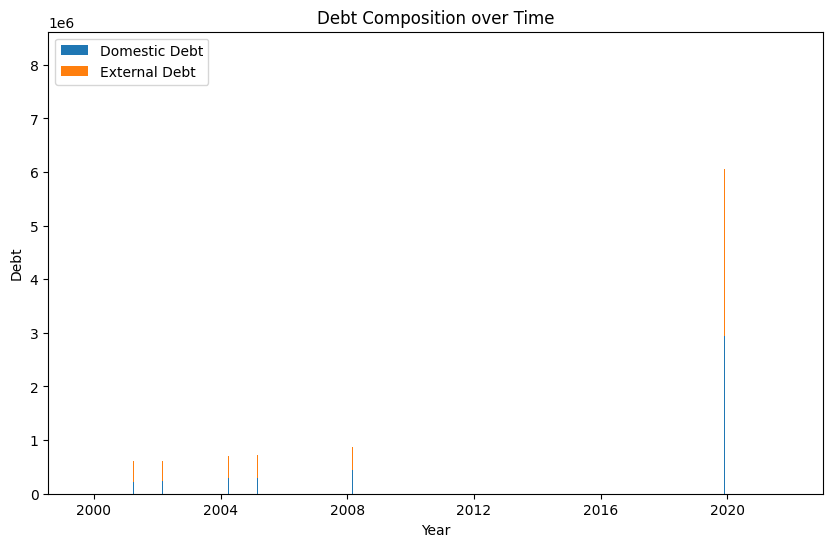

In [41]:
#Stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Domestic Debt'], label='Domestic Debt')
plt.bar(df['Date'], df['External Debt'], bottom = df['Domestic Debt'], label='External Debt')
plt.title('Debt Composition over Time')
plt.xlabel('Year')
plt.ylabel('Debt')
plt.legend()
plt.show()

In [42]:
#Correlation Analysis between Domestic and External debt
correlation = df[['Domestic Debt', 'External Debt']].corr()
print(correlation)


               Domestic Debt  External Debt
Domestic Debt       1.000000       0.992531
External Debt       0.992531       1.000000


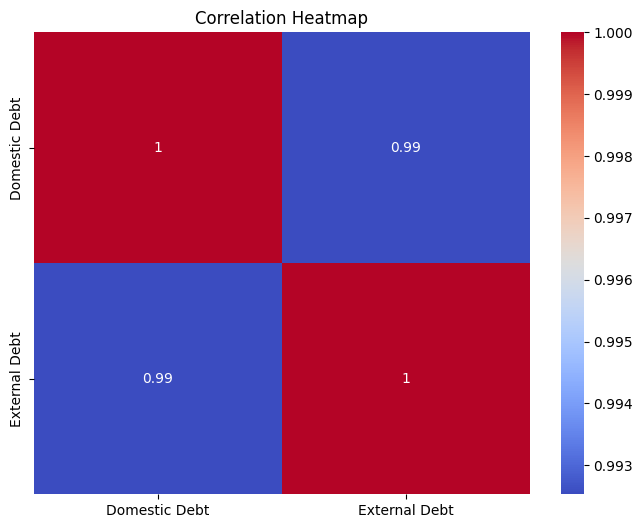

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()